# Exploratory Data Analysis - Retail 

## Task list: 

1) perform 'exploratory Data Analysis' on the dataset provided 

2) As a business manager, try to find out the weak areas where you can work to make more profit. 

3) What all business problems you can derive by exploring the data ? 

4) you can choose any of the following tools: powerbi, tableau etc...

5) dataset: https://bit.ly/3i4rbWl

6) create dashboards. screen-record along with your audio explaining the charts and interpretations 

In [2]:
# basics data importation & exploration

# data importation...
import pandas as pd
url = "Downloads\SampleSuperstore.csv"

# Load into pandas DataFrame...
df = pd.read_csv(url)

#data exploration...
display(df.head())
display(df.info())
display(df.describe())


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


None

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Eploratory Data Analysis 

### Relationship between the numerical variables ( Sales, Quantity, Discount, Profit)

### Heatmap - correlations 

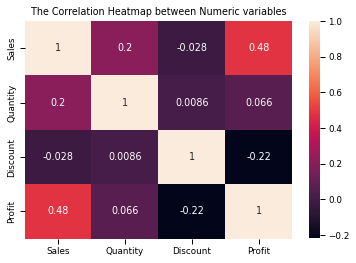

In [3]:
# Correlation Heatmap between Numeric variables...
import seaborn as sns 
import matplotlib.pyplot as plt

num_col = ["Sales", "Quantity", "Discount", "Profit"]
corr_mat = df[num_col].corr()
sns.set_context("paper", font_scale= 1 )
sns.heatmap(corr_mat, annot=True)
plt.title("The Correlation Heatmap between Numeric variables")
plt.show()

## Comments

It can be observed that there is a direct relationship between the profit variable and the sales variable, indicating a positive correlation. Additionally, a slight correlation can also be observed between profits and quantity. 

## Target variable - profit


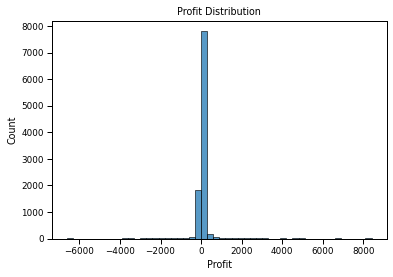

In [49]:
# Profit variable distribution...

sns.histplot(data= df, x="Profit", bins= 50)
plt.title("Profit Distribution")
plt.show()


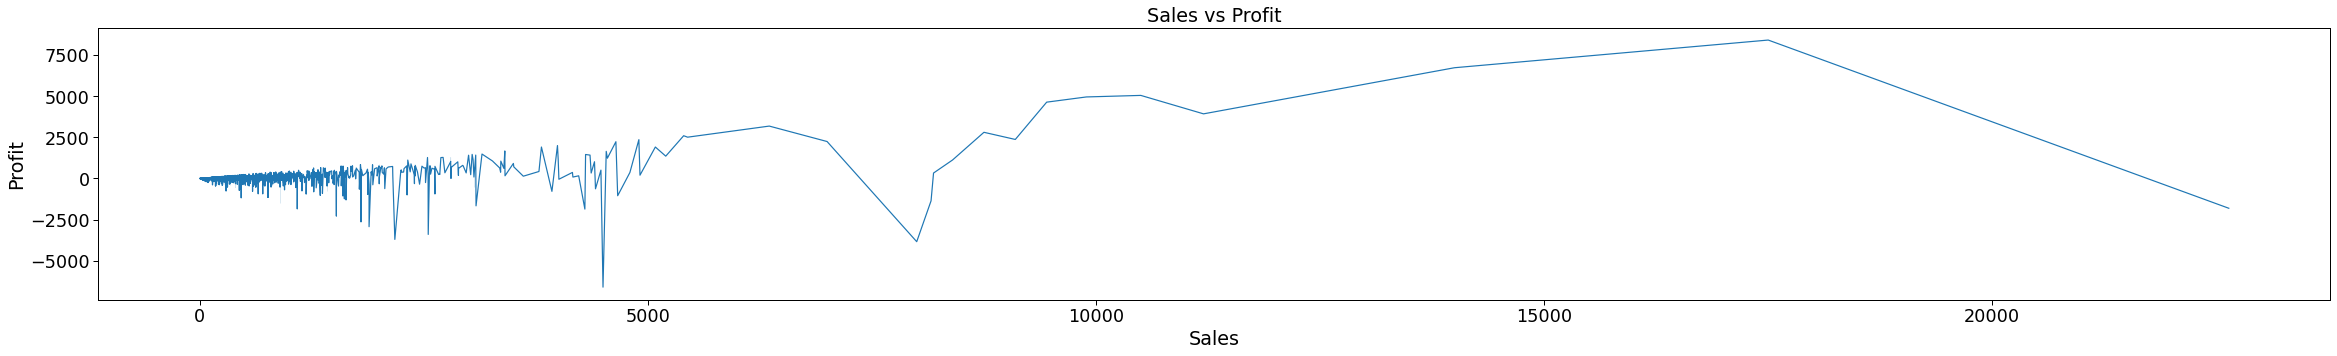

In [62]:
# Let's investigate the behavior of the profit variable in relation to sales...

plt.figure(figsize=(40, 5))
sns.set_context("paper", font_scale=2 )
ax = sns.lineplot(data= df, x="Sales", y="Profit")
plt.title("Sales vs Profit")
plt.show()

## Comments 


Upon observation, it is evident that in most cases, an increase in sales leads to a corresponding increase in profits. However, it is crucial to highlight the critical point (4700, -5300) where a substantial sale can result in a negative profit, revealing the volatility of the business. Moreover, the irregularity observed in the curve signifies the inevitability of losses. Therefore, the emphasis should be on maximizing profits to achieve a balanced outcome.

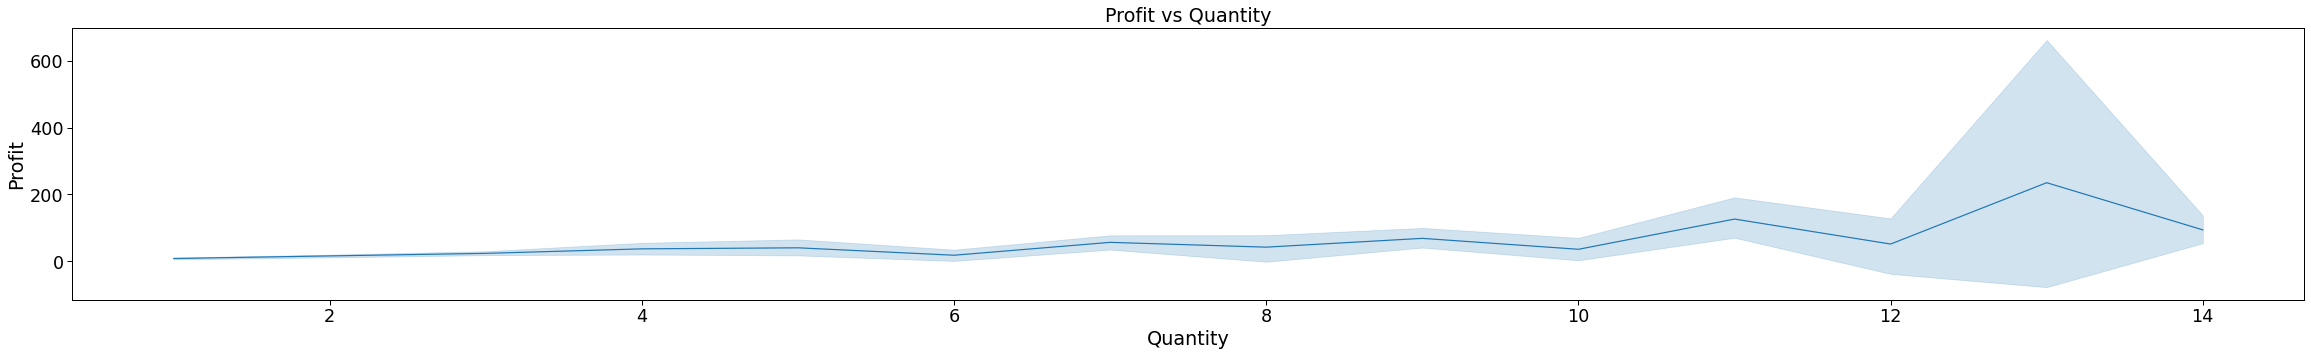

In [61]:
# Let's investigate the behavior of the profit variable in relation to quantities...

plt.figure(figsize=(40, 5))
sns.set_context("paper", font_scale=2 )
ax = sns.lineplot(data= df, x="Quantity", y="Profit")
plt.title("Profit vs Quantity")
plt.show()

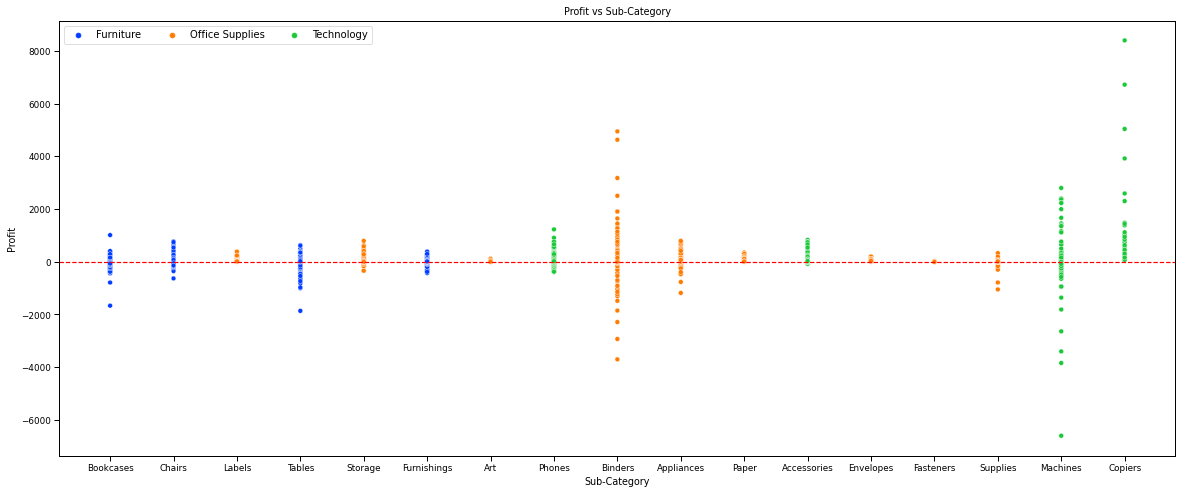

In [57]:
#Let's delve deeper into the relationship between the profit variable and the sub-category variable via a scatter plot...

plt.figure(figsize=(20, 8))
sns.set_context("paper", font_scale=1)

ax= sns.scatterplot(data= df, x="Sub-Category", y="Profit", hue="Category", palette= "bright")
ax.legend(loc= 'upper left', ncol=6, fontsize=10)
plt.axhline(y=0, color='r', linestyle='--')
ax.set_title("Profit vs Sub-Category")

plt.show()

## Comments 

In our observations, we find that the technology category, specifically copiers, phones, and accessories, demonstrates remarkable positive profits. Similarly, we can extend this analysis to other categories and their respective subcategories.

In other hand, notice that in the technology category 

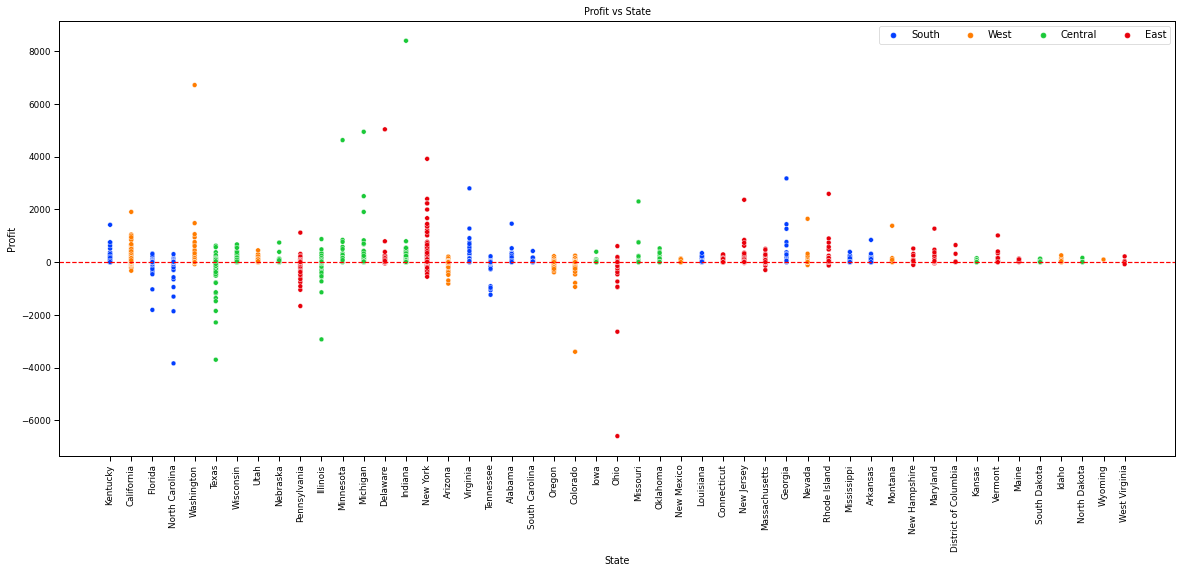

In [58]:
# what about the relationship between the profit variable and the State variable ...

plt.figure(figsize=(20, 8))
ax= sns.scatterplot(data= df, x="State", y="Profit", hue="Region", palette= "bright")
plt.xticks(rotation=90)
ax.legend(loc= 'upper right', ncol=4, fontsize=10)
plt.axhline(y=0, color='r', linestyle='--')
ax.set_title("Profit vs State")


plt.show()

## Comments 

Continuing with the analysis, we note substantial profits in specific states, namely New York, Georgia, California, Kentucky, and Washington. These states demonstrate notable profitability, as observed in our examination.

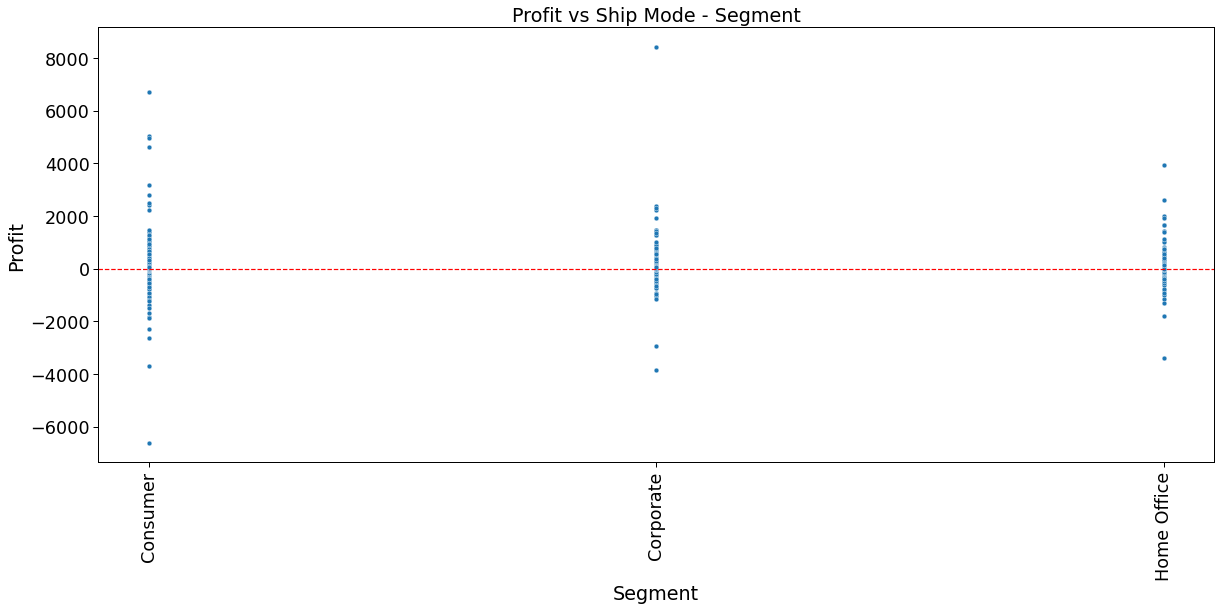

In [66]:
# what about the relationship between the profit variable and the State variable ...

plt.figure(figsize=(20, 8))
ax= sns.scatterplot(data= df, x="Segment", y="Profit", palette= "bright")
plt.xticks(rotation=90)
#ax.legend(loc= 'upper right', ncol=4, fontsize=10)
plt.axhline(y=0, color='r', linestyle='--')
ax.set_title("Profit vs Ship Mode - Segment")

>L.
plt.show()

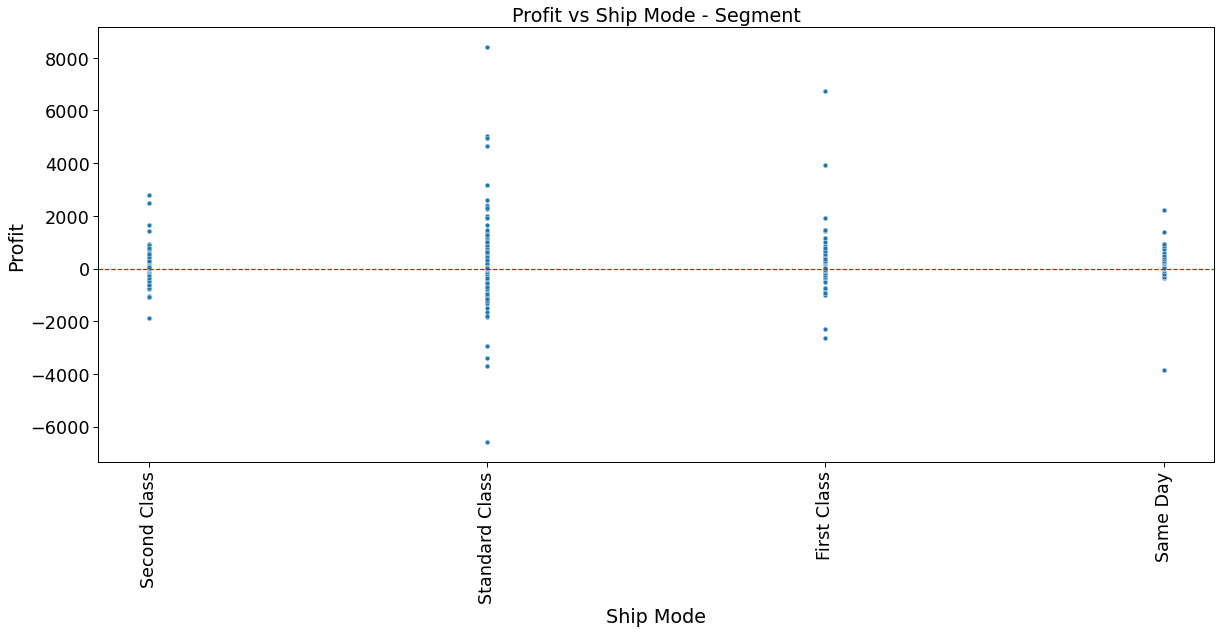

In [67]:
# what about the relationship between the profit variable and the State variable ...

plt.figure(figsize=(20, 8))
ax= sns.scatterplot(data= df, x="Ship Mode", y="Profit", palette= "bright")
plt.xticks(rotation=90)
#ax.legend(loc= 'upper right', ncol=4, fontsize=10)
plt.axhline(y=0, color='r', linestyle='--')
ax.set_title("Profit vs Ship Mode - Segment")


plt.show()